In [164]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Upload and read CSVs
obesity_df = pd.read_csv("Resources/obesity.csv")
food_df = pd.read_csv("Resources/FastFoodRestaurants.csv")
temp_df = pd.read_csv("Resources/monthly_temp.csv")
pop_df = pd.read_csv("Resources/us_pop_by_state.csv")
regions_df = pd.read_csv("Resources/regions.csv")
income_df = pd.read_csv("Resources/income.csv")

In [165]:
#Remove Columnns
#Obesity
obesity_filtered_df = obesity_df[["NAME", "Obesity"]]

#Monthly temp
temp_filtered_df = temp_df[["month", "year", "state", "average_temp"]]

#Food
food_filtered_df = food_df[["city", "name", "province"]]

#Population
pop_filtered_df = pop_df[["state", "state_code", "2020_census", "percent_of_total"]]


# Obesity vs Temp

In [166]:
#Get most recent year
temp_2021_df = temp_filtered_df.loc[temp_filtered_df["year"]==2021]

#Rename column for merge
temp_2021_df = temp_2021_df.rename(columns={"state": "NAME"})

temp_2021_df.tail()

,month,year,NAME,average_temp
41467,12,2021,Virginia,45.2
41468,12,2021,Washington,34.7
41469,12,2021,West Virginia,41.8
41470,12,2021,Wisconsin,29.3
41471,12,2021,Wyoming,31.3


In [167]:
#Filter to December and Merge
dec_df = temp_2021_df.loc[temp_2021_df["month"]==12]
#Filter to March
march_df = temp_2021_df.loc[temp_2021_df["month"]==3]
#Filter to July
july_df = temp_2021_df.loc[temp_2021_df["month"]==7]
#Filter to October
oct_df = temp_2021_df.loc[temp_2021_df["month"]==10]

#Merge with Obesity
dec_ob_df = pd.merge(obesity_filtered_df, dec_df, on="NAME", how = "inner")
march_ob_df = pd.merge(obesity_filtered_df, march_df, on="NAME", how="inner")
july_ob_df = pd.merge(obesity_filtered_df, july_df, on="NAME", how="inner")
oct_ob_df = pd.merge(obesity_filtered_df, oct_df, on="NAME", how="inner")


In [168]:
#Rename columns to month
dec_ob_df = dec_ob_df.rename(columns={"average_temp":"dec_temp"})
march_ob_df = march_ob_df.rename(columns={"average_temp":"march_temp"})
july_ob_df = july_ob_df.rename(columns={"average_temp":"july_temp"})
oct_ob_df = oct_ob_df.rename(columns={"average_temp":"oct_temp"})

In [169]:
#Merge all to one and drop unnecesary columns
dec_march_df = pd.merge(dec_ob_df, march_ob_df, on=["NAME", "Obesity", "year"], how="inner")
dec_march_df = dec_march_df.drop(columns={"month_x", "month_y"})

dec_march_july_df = pd.merge(dec_march_df, july_ob_df, on=["NAME", "Obesity", "year"], how="inner")
dec_march_july_df = dec_march_july_df.drop(columns={"month"})

all_df = pd.merge(dec_march_july_df, oct_ob_df, on=["NAME", "Obesity", "year"], how="inner")
all_df = all_df.drop(columns={"month"})

all_df.head()

,NAME,Obesity,year,dec_temp,march_temp,july_temp,oct_temp
0,Texas,32.4,2021,58.2,51.6,80.5,74.0
1,California,24.2,2021,49.2,47.8,77.4,65.2
2,Kentucky,34.6,2021,45.5,41.4,74.6,65.6
3,Georgia,30.7,2021,54.6,54.7,78.2,70.4
4,Wisconsin,30.7,2021,29.3,23.8,69.4,57.4


In [170]:
#Get certain months
temps_2021 = temp_2021_df.loc[(temp_2021_df["month"]==12)|(temp_2021_df["month"]==3)|(temp_2021_df["month"]==7)\
                                |(temp_2021_df["month"]==10)]

#Merge with Obesity
merged_df = pd.merge(obesity_filtered_df, temps_2021, on="NAME", how="inner")

merged_df

,NAME,Obesity,month,year,average_temp
0,Texas,32.4,3,2021,51.6
1,Texas,32.4,7,2021,80.5
2,Texas,32.4,10,2021,74.0
3,Texas,32.4,12,2021,58.2
4,California,24.2,3,2021,47.8
...,...,...,...,...,...
187,North Dakota,31.0,12,2021,23.4
188,New Hampshire,26.3,3,2021,26.4
189,New Hampshire,26.3,7,2021,65.8
190,New Hampshire,26.3,10,2021,56.2


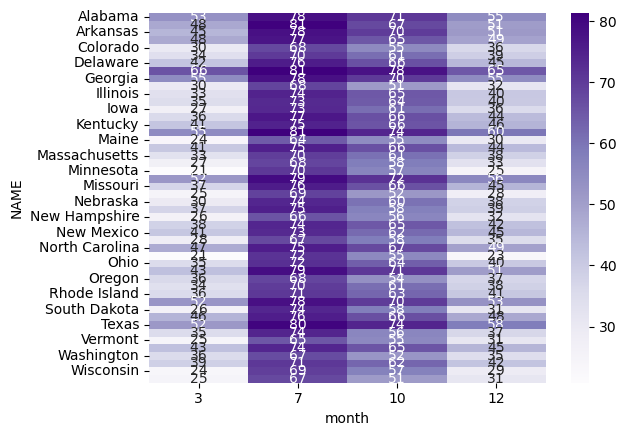

In [171]:
#Create heatmap
temp_matrix = merged_df.pivot_table(index="NAME", columns="month", values="average_temp")

heatmap=sns.heatmap(temp_matrix, cmap="Purples", annot=True, fmt="0.0f")

plt.show()

In [172]:
all_df.dtypes

NAME           object
Obesity       float64
year            int64
dec_temp      float64
march_temp    float64
july_temp     float64
oct_temp      float64
dtype: object

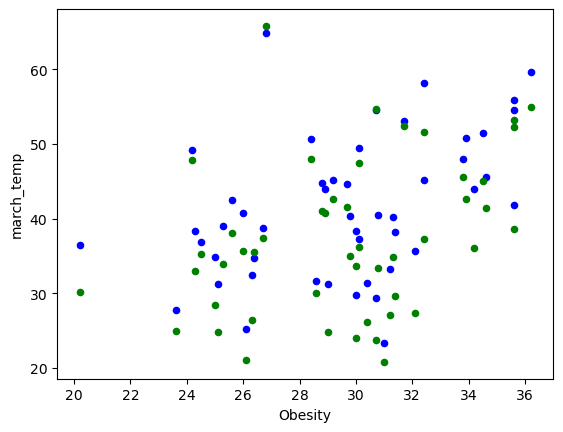

In [173]:
#Scatter of average temp vs obesity
ax1=all_df.plot(kind="scatter", x="Obesity", y="dec_temp", color="b")
ax2=all_df.plot(kind="scatter", x="Obesity", y="march_temp", color = "g", ax=ax1)
plt.show()

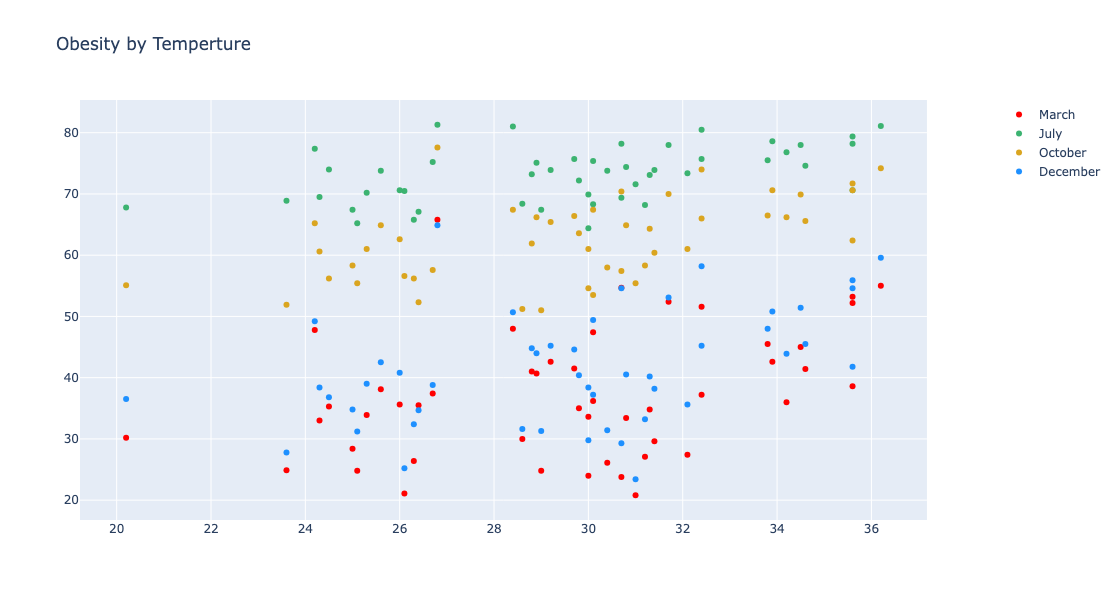

In [213]:
#Plot Obesity vs temperature by month
march = go.Scatter(x=all_df["Obesity"], y=all_df["march_temp"], mode="markers", 
                   hovertemplate=all_df["NAME"], name="March", marker_color="red")
july = go.Scatter(x=all_df["Obesity"], y=all_df["july_temp"], mode="markers",
                  hovertemplate=all_df["NAME"], name="July", marker_color="mediumseagreen")
oct = go.Scatter(x=all_df["Obesity"], y=all_df["oct_temp"], mode="markers", 
                 hovertemplate=all_df["NAME"], name="October", marker_color="goldenrod")
dec = go.Scatter(x=all_df["Obesity"], y=all_df["dec_temp"], mode="markers", 
                 hovertemplate=all_df["NAME"], name="December", marker_color="dodgerblue")

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(march)
fig.add_trace(july,secondary_y=False)
fig.add_trace(oct,secondary_y=False)
fig.add_trace(dec,secondary_y=False)

fig["layout"].update(height=600, width=900, title="Obesity by Temperture")
fig.show()


# Obesity vs State

In [175]:
# Merge regions and temps
#Rename column regions
regions_df = regions_df.rename(columns={"State":"NAME"})

#Merge region and all
regions_merged_df = pd.merge(all_df, regions_df, on="NAME", how="inner")

regions_merged_df.head()

,NAME,Obesity,year,dec_temp,march_temp,july_temp,oct_temp,State Code,Region,Division
0,Texas,32.4,2021,58.2,51.6,80.5,74.0,TX,South,West South Central
1,California,24.2,2021,49.2,47.8,77.4,65.2,CA,West,Pacific
2,Kentucky,34.6,2021,45.5,41.4,74.6,65.6,KY,South,East South Central
3,Georgia,30.7,2021,54.6,54.7,78.2,70.4,GA,South,South Atlantic
4,Wisconsin,30.7,2021,29.3,23.8,69.4,57.4,WI,Midwest,East North Central


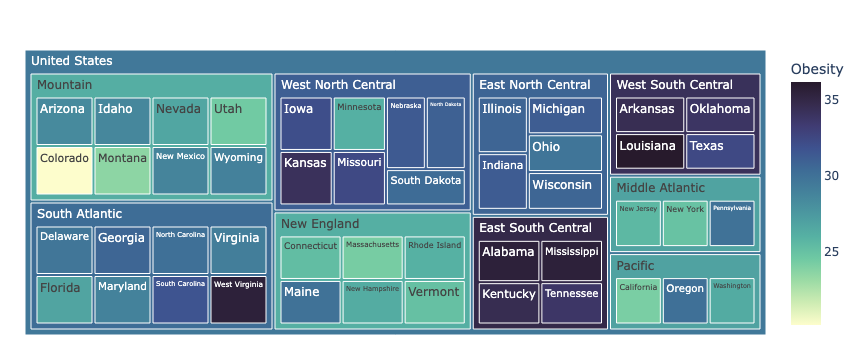

In [176]:
#Treemap of Obesity
fig=px.treemap(regions_merged_df, path=[px.Constant("United States"), "Division", "NAME"],
              color="Obesity", hover_data=["NAME"],
              color_continuous_scale="deep")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

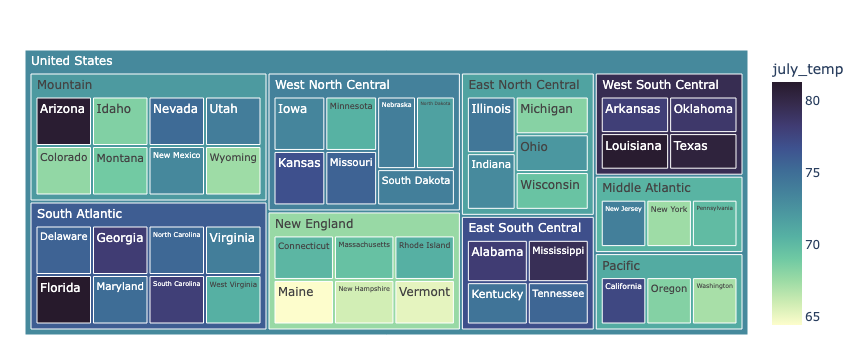

In [177]:
#Treemap of July Temp
fig=px.treemap(regions_merged_df, path=[px.Constant("United States"), "Division", "NAME"],
              color="july_temp", hover_data=["NAME"],
              color_continuous_scale="deep")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

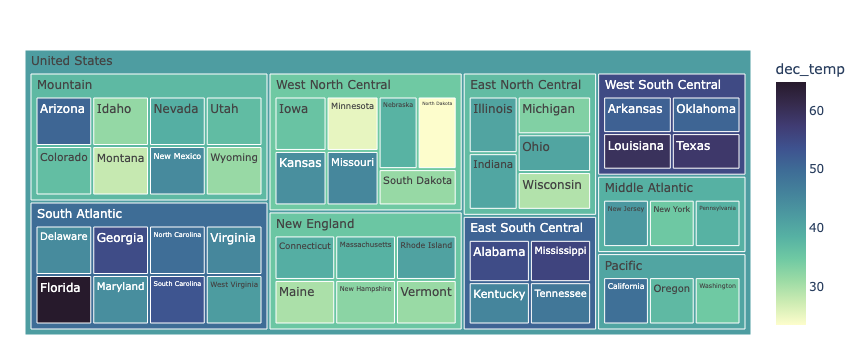

In [178]:
#Treemap of Dec Temp
fig=px.treemap(regions_merged_df, path=[px.Constant("United States"), "Division", "NAME"],
              color="dec_temp", hover_data=["NAME"],
              color_continuous_scale="deep")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

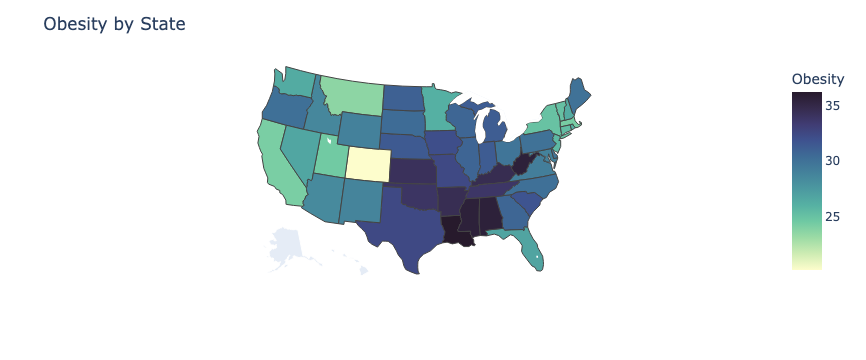

In [179]:
#Map by Obesity

fig = px.choropleth(regions_merged_df, locations="State Code", locationmode="USA-states", 
                    color="Obesity", scope="usa", 
                    color_continuous_scale="deep")
fig.update_layout(title="Obesity by State")
fig.show()

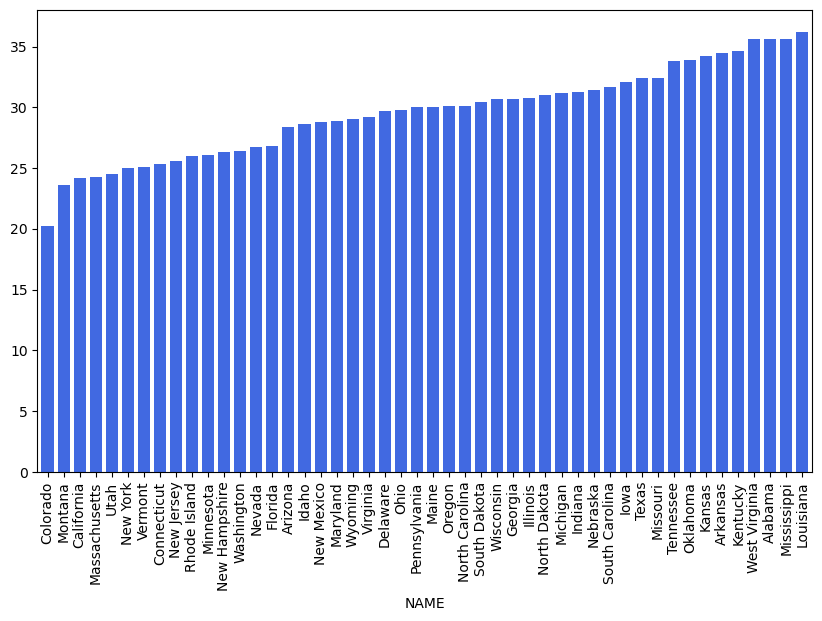

In [180]:
all_sorted = all_df.sort_values("Obesity")
by_state_bar = all_sorted.plot(kind="bar", x="NAME", y="Obesity", width = 0.75, figsize=(10,6), color="royalblue", legend = False)

plt.show()

# Obesity vs Income

In [183]:
#Clean income_df
#Rename columns
income_df = income_df.rename(columns={"Median\nincome":"Median Income", "Standard\nerror":"Standard Error"})

#Change Data Types
income_df = income_df.astype({"Median Income":"int64", "Standard Error":"int64"})


NAME              object
Median Income      int64
Standard Error     int64
dtype: object

In [186]:
#Find for 2018
#Get most recent year
temp_2018_df = temp_filtered_df.loc[temp_filtered_df["year"]==2018]

#Rename column for merge
temp_2018_df = temp_2018_df.rename(columns={"state": "NAME"})

temp_2018_df.tail()

,month,year,NAME,average_temp
39739,12,2018,Virginia,41.8
39740,12,2018,Washington,35.8
39741,12,2018,West Virginia,38.4
39742,12,2018,Wisconsin,26.2
39743,12,2018,Wyoming,25.0


In [202]:
#Filter to December and Merge
dec_df = temp_2018_df.loc[temp_2018_df["month"]==12]
#Filter to March
march_df = temp_2018_df.loc[temp_2018_df["month"]==3]
#Filter to July
july_df = temp_2018_df.loc[temp_2018_df["month"]==7]
#Filter to October
oct_df = temp_2018_df.loc[temp_2018_df["month"]==10]

#Merge with Obesity
dec_ob_df = pd.merge(obesity_filtered_df, dec_df, on="NAME", how = "inner")
march_ob_df = pd.merge(obesity_filtered_df, march_df, on="NAME", how="inner")
july_ob_df = pd.merge(obesity_filtered_df, july_df, on="NAME", how="inner")
oct_ob_df = pd.merge(obesity_filtered_df, oct_df, on="NAME", how="inner")

#Rename columns to month
dec_ob_df = dec_ob_df.rename(columns={"average_temp":"dec_temp"})
march_ob_df = march_ob_df.rename(columns={"average_temp":"march_temp"})
july_ob_df = july_ob_df.rename(columns={"average_temp":"july_temp"})
oct_ob_df = oct_ob_df.rename(columns={"average_temp":"oct_temp"})

#Merge all to one and drop unnecesary columns
dec_march_df = pd.merge(dec_ob_df, march_ob_df, on=["NAME", "Obesity", "year"], how="inner")
dec_march_df = dec_march_df.drop(columns={"month_x", "month_y"})

dec_march_july_df = pd.merge(dec_march_df, july_ob_df, on=["NAME", "Obesity", "year"], how="inner")
dec_march_july_df = dec_march_july_df.drop(columns={"month"})

all_2018_df = pd.merge(dec_march_july_df, oct_ob_df, on=["NAME", "Obesity", "year"], how="inner")
all_2018_df = all_2018_df.drop(columns={"month"})

all_2018_df.head()

,NAME,Obesity,year,dec_temp,march_temp,july_temp,oct_temp
0,Texas,32.4,2018,50.1,57.0,84.2,70.8
1,California,24.2,2018,48.7,47.8,75.5,66.0
2,Kentucky,34.6,2018,41.2,44.4,76.0,66.0
3,Georgia,30.7,2018,51.7,56.8,79.8,74.1
4,Wisconsin,30.7,2018,26.2,22.9,68.2,52.4


In [208]:
#Get certain months
temps_2018 = temp_2018_df.loc[(temp_2018_df["month"]==12)|(temp_2018_df["month"]==3)|(temp_2018_df["month"]==7)\
                                |(temp_2018_df["month"]==10)]

#Merge with Obesity
merged_1_df = pd.merge(obesity_filtered_df, temps_2018, on="NAME", how="inner")

merged_1_df


#Merge with Income
merged_income_df = pd.merge(merged_1_df, income_df, how="left", on="NAME")

merged_income_df

,NAME,Obesity,month,year,average_temp,Median Income,Standard Error
0,Texas,32.4,3,2018,57.0,59785,1372
1,Texas,32.4,7,2018,84.2,59785,1372
2,Texas,32.4,10,2018,70.8,59785,1372
3,Texas,32.4,12,2018,50.1,59785,1372
4,California,24.2,3,2018,47.8,70489,1233
...,...,...,...,...,...,...,...
187,North Dakota,31.0,12,2018,21.8,66505,3095
188,New Hampshire,26.3,3,2018,28.6,81346,3394
189,New Hampshire,26.3,7,2018,65.6,81346,3394
190,New Hampshire,26.3,10,2018,53.0,81346,3394


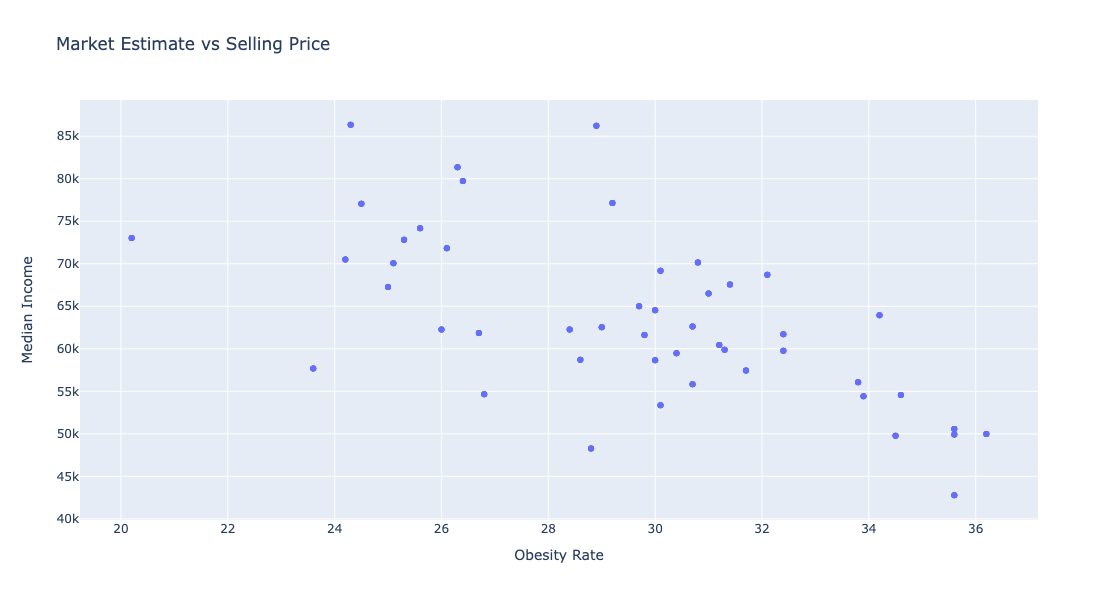

In [214]:
#Plot Obesity vs Median Income by month
fig = px.scatter(merged_income_df, x="Obesity", y = 'Median Income',hover_data=["NAME"], labels={"Obesity":"Obesity Rate",
                                                                        "Price":"Selling Price", "NAME":"State"}, title = "Market Estimate vs Selling Price", width=900, height=600)

#fig["layout"].update(height=600, width=900, title="Obesity by Median Income")
fig.show()
